In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import konlpy

print(tf.__version__)
print(np.__version__)
# print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.21.4
0.5.2


In [ ]:
#SentencePiece, updated, version 


# SentencePiece 설치
- Google에서 제공하는 오픈소스기반 Sentence Tokenizer/Detokenizer

In [3]:
!pip install sentencepiece

# SentencePiece 모델 학습 

In [4]:
# #토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동 생성하는 함수
# def tokenize(corpus):  # corpus: Tokenized Sentence's List
#     tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='') # 실험.... 
#     tokenizer.fit_on_texts(corpus)

#     tensor = tokenizer.texts_to_sequences(corpus)

#     tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post') # 실험할 수 있는 부분

#     return tensor, tokenizer

# filtered corpus 정의

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


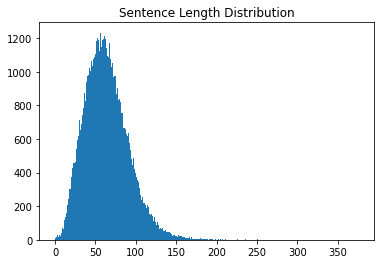

In [5]:
# #filtered_corpus 정의
# #데이터 가져오기
# import os
# path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'
# with open(path_to_file, "r") as f:
#     raw = f.read().splitlines()
# #데이터의 중복 제거 
# min_len = 999
# max_len = 0
# sum_len = 0

# filtered_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
# print("Data Size:", len(filtered_corpus))

# for sen in filtered_corpus:
#     length = len(sen)
#     if min_len > length: min_len = length
#     if max_len < length: max_len = length
#     sum_len += length

# print("문장의 최단 길이:", min_len)
# print("문장의 최장 길이:", max_len)
# print("문장의 평균 길이:", sum_len // len(filtered_corpus))

# sentence_length = np.zeros((max_len), dtype=int)

# for sen in filtered_corpus:   # 중복이 제거된 코퍼스 기준
#     sentence_length[len(sen)-1] += 1

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution")
# plt.show()


# SentencePiece 모델 학습 과정

In [6]:
# import sentencepiece as spm
# import os

# # 1. 준비
# corpus_path = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'
# with open(corpus_path, 'w') as f:
#     for row in filtered_corpus:
#         f.write(str(row) + '\n')

# # 2. 실험할 vocab_size 및 model_type 목록
# vocab_sizes = [6000, 8000, 10000]
# model_types = ['unigram', 'bpe', 'word', 'char']

# # 3. 반복 학습
# for vocab_size in vocab_sizes:
#     for model_type in model_types:
#         model_prefix = f'korean_spm_{model_type}_{vocab_size}'
#         print(f"Training model: {model_prefix}")
#         spm.SentencePieceTrainer.Train(
#             f'--input={corpus_path} --model_prefix={model_prefix} '
#             f'--vocab_size={vocab_size} --model_type={model_type}'
#         )


In [7]:
# # SentencePiece 모델 학습 과정
# import sentencepiece as spm
# import os
# temp_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

# vocab_size = 8000   # 실험할 부분

# with open(temp_file, 'w') as f:
#     for row in filtered_corpus:
#         f.write(str(row) + '\n')
        
# spm.SentencePieceTrainer.Train(
#     '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)  # 실험할 부분 모델 타입
# )

# !ls -l korean_spm*


sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376710 May  9 07:58 korean_spm.model
-rw-r--r-- 1 root root 146141 May  9 07:58 korean_spm.vocab


In [8]:
# #SentencePice 모델 활용
# s = spm.SentencePieceProcessor()
# s.Load('korean_spm.model')

# #SentencePiece를 활용한 sentence -> encoding
# tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
# print(tokensIDs)

# #SentencePIece를 활용한 sentence -> encoded pieces
# print(s.SampleEncodeAsPieces('아버지가방에들어가신다.', 1, 0.0))

# #SentencePiece를 활용한 encoding -> sentence 복원
# print(s.DecodeIds(tokensIDs))

[1255, 11, 304, 7, 3606, 11, 285, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


# Tokenizer 함수 작성
- SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize()함수 정의 
- 1. 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list를 전달
- 2. 생성된 vocab 파일을 읽어와 {<word> : <idx>} 형태를 가지는 word_index 사전과 {<idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환
- 3. 리턴값인 tensor는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding하기

In [9]:
# def sp_tokenize(s, corpus): 

#     tensor = []

#     for sen in corpus:
#         tensor.append(s.EncodeAsIds(sen))

#     with open("./spm/korean_spm.vocab", 'r') as f:
#         vocab = f.readlines()

#     word_index = {}
#     index_word = {}

#     for idx, line in enumerate(vocab):
#         word = line.split("\t")[0]

#         word_index.update({word:idx})
#         index_word.update({idx:word})

#     tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

#     return tensor, word_index, index_word

# 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용하기

- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델 재학습
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- SentencePiece 모델의 model_type, vocab_size를 변경해 가면서 성능 개선 여부 확인
    - vocab_size = 6000, 8000, 10000
    - spm.SentencePieceTrainer.Train() : 모델 타입 변경
        - unigram(기본값), bpe, word(단어 단위), char(문자 단위)

## 1. 네이버 영화리뷰 감정 분석 데이터 준비

In [29]:
import pandas as pd
train_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt'
test_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt'
train_data = pd.read_table(train_url)
test_data = pd.read_table(test_url)

# 확인
print(train_data.head())
print(test_data.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
        id                                           document  label
0  6270596                                                굳 ㅋ      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3  6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4  6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0


In [30]:
train_data['label'].unique()

array([0, 1])

## 텍스트만 추출, 공백 제거, 베어있는 문장 제거

In [31]:
# 텍스트만 추출
train_corpus = [
    str(s).strip()
    for s in train_data['document']
    if isinstance(s, str) and str(s).strip()
]

test_corpus = [
    str(s).strip()
    for s in test_data['document']
    if isinstance(s, str) and str(s).strip()
]

# 중복 제거된 학습 코퍼스
filtered_corpus = list(set(train_corpus))

print("✔️ 중복 제거 전 문장 수:", len(train_corpus))
print("✔️ 중복 제거 후 문장 수:", len(filtered_corpus))


✔️ 중복 제거 전 문장 수: 149995
✔️ 중복 제거 후 문장 수: 146182


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


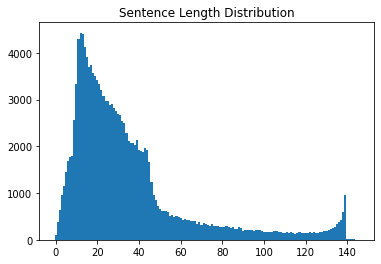

In [32]:
# 문장 길이 분석
#데이터의 중복 제거 
min_len = 999
max_len = 0
sum_len = 0


for sen in filtered_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(filtered_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [33]:
# 문장 길이 5 이상만 사용
filtered_corpus = [s for s in filtered_corpus if len(s) >= 5]

max_len = 100 으로 설정

## 2. SentencePiece 학습용 파일 생성

In [34]:
import os
def write_temp_file(corpus, save_path):
    with open(save_path, 'w') as f:
        for line in corpus:
            if line.strip():
                f.write(line.strip() + '\n')

temp_file = os.path.expanduser('~/sp_corpus.txt')
write_temp_file(filtered_corpus, temp_file)

In [16]:
!pip install konlpy

## 3. SentencePiece 모델 학습
- vocab_size = 8000
- model_type = unigram

In [35]:
# SentencePiece 모델 학습 과정
import sentencepiece as spm
import os
vocab_size = 8000   

with open(temp_file, 'w') as f:
    for row in filtered_corpus:
        f.write(str(row) + '\n')
        
spm.SentencePieceTrainer.Train(
    f"--input={temp_file} --model_prefix=spm_unigram_8000 --vocab_size=8000 --model_type=unigram"
)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/sp_corpus.txt --model_prefix=spm_unigram_8000 --vocab_size=8000 --model_type=unigram
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/sp_corpus.txt
  input_format: 
  model_prefix: spm_unigram_8000
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <un

In [18]:
#SentencePice 모델 활용
s = spm.SentencePieceProcessor()
s.Load('spm_unigram_8000.model')

#SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나')
print(tokensIDs)

#SentencePIece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', 1, 0.0))

#SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1838, 8, 5091, 157, 1425, 32, 297, 61, 163, 426, 355, 1342, 7039, 821, 406]
['▁흠', '...', '포스터', '보고', '▁초딩', '영화', '줄', '....', '오', '버', '연기', '조차', '▁가볍지', '▁않', '구나']
흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나


## 4. sp_tokenize() 구현

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sentencepiece as spm

def sp_tokenize(model_path, corpus, vocab_path=None, max_len=100):
    sp = spm.SentencePieceProcessor()
    sp.load(model_path)

    # 토큰화 후 시퀀스 생성
    tensor = [sp.encode_as_ids(str(s)) for s in corpus]
    tensor = pad_sequences(tensor, padding='post', maxlen=max_len)

    # vocab 파일 경로 자동 처리
    if vocab_path is None:
        vocab_path = model_path.replace(".model", ".vocab")

    # vocab 파일에서 인덱스 ↔ 서브워드 사전 구성
    word_index = {}
    index_word = {}

    with open(vocab_path, 'r', encoding='utf-8') as f:
        for idx, line in enumerate(f):
            token = line.split('\t')[0]
            word_index[token] = idx
            index_word[idx] = token

    return tensor, word_index, index_word


In [39]:
import sentencepiece as spm

vocab_sizes = [8000]
model_types = ['bpe', 'word', 'char']

for vocab_size in vocab_sizes:
    for model_type in model_types:
        prefix = f'spm_{model_type}_{vocab_size}'
        spm.SentencePieceTrainer.Train(
            f'--input={temp_file} --model_prefix={prefix} '
            f'--vocab_size={vocab_size} --model_type={model_type}'
        )


sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/sp_corpus.txt --model_prefix=spm_bpe_8000 --vocab_size=8000 --model_type=bpe
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/sp_corpus.txt
  input_format: 
  model_prefix: spm_bpe_8000
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: 

## 3. SentencePiece 기반 RNN 모델 학습

### unigram, vocab_size = 8000
- test accuracy : 0.6674

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


def build_rnn_model(vocab_size):
    model = Sequential([
        Embedding(vocab_size, 128),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ 올바른 전처리
X_train_sp, word_index, index_word = sp_tokenize("spm_unigram_8000.model", train_data['document'])
X_test_sp, _, _ = sp_tokenize("spm_unigram_8000.model", test_data['document'])
vocab_size = len(word_index)

y_train, y_test = train_data['label'].values, test_data['label'].values

# ✅ 학습
model_sp = build_rnn_model(vocab_size)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_sp.fit(X_train_sp, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks = [early_stop])

# ✅ 평가
acc_sp = model_sp.evaluate(X_test_sp, y_test)[1]
print(f"✅ SentencePiece + RNN Test Accuracy: {acc_sp:.4f}")


Epoch 1/10
938/938 [==============================] - 73s 77ms/step - loss: 0.6955 - accuracy: 0.5012 - val_loss: 0.6948 - val_accuracy: 0.4933
Epoch 2/10
938/938 [==============================] - 72s 76ms/step - loss: 0.6834 - accuracy: 0.5592 - val_loss: 0.6747 - val_accuracy: 0.6001
Epoch 3/10
938/938 [==============================] - 71s 76ms/step - loss: 0.6381 - accuracy: 0.6450 - val_loss: 0.6388 - val_accuracy: 0.6363
Epoch 4/10
938/938 [==============================] - 71s 75ms/step - loss: 0.5996 - accuracy: 0.6755 - val_loss: 0.6095 - val_accuracy: 0.6546
Epoch 5/10
938/938 [==============================] - 71s 76ms/step - loss: 0.5745 - accuracy: 0.6927 - val_loss: 0.5998 - val_accuracy: 0.6701
Epoch 6/10
938/938 [==============================] - 71s 76ms/step - loss: 0.5598 - accuracy: 0.7037 - val_loss: 0.5974 - val_accuracy: 0.6748
Epoch 7/10
938/938 [==============================] - 71s 75ms/step - loss: 0.5469 - accuracy: 0.7142 - val_loss: 0.6014 - val_accuracy:

In [ ]:
import sentencepiece as spm

vocab_sizes = [8000, 10000]
model_types = ['unigram','bpe']

for vocab_size in vocab_sizes:
    for model_type in model_types:
        prefix = f'spm_{model_type}_{vocab_size}'
        spm.SentencePieceTrainer.Train(
            f'--input={temp_file} --model_prefix={prefix} '
            f'--vocab_size={vocab_size} --model_type={model_type}'
        )


### bpe, vocab_size = 8000
- test accuracy : 0.7034

In [41]:
# ✅ 올바른 전처리
X_train_sp, word_index, index_word = sp_tokenize("spm_bpe_8000.model", train_data['document'])
X_test_sp, _, _ = sp_tokenize("spm_bpe_8000.model", test_data['document'])
vocab_size = len(word_index)

y_train, y_test = train_data['label'].values, test_data['label'].values

# ✅ 학습
model_sp = build_rnn_model(vocab_size)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_sp.fit(X_train_sp, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks = [early_stop])

# ✅ 평가
acc_sp = model_sp.evaluate(X_test_sp, y_test)[1]
print(f"✅ SentencePiece(bpe, 8000) + RNN Test Accuracy: {acc_sp:.4f}")

OSError: Not found: "orean_spm_bpe_8000.model": No such file or directory Error #2

## bpe, vocabsize=10000
- test accuracy = 0.7780

In [ ]:
# ✅ 올바른 전처리
X_train_sp, word_index, index_word = sp_tokenize("spm_bpe_10000.model", train_data['document'])
X_test_sp, _, _ = sp_tokenize("spm_bpe_10000.model", test_data['document'])
vocab_size = len(word_index)

y_train, y_test = train_data['label'].values, test_data['label'].values

# ✅ 학습
model_sp = build_rnn_model(vocab_size)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_sp.fit(X_train_sp, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks = [early_stop])

# ✅ 평가
acc_sp = model_sp.evaluate(X_test_sp, y_test)[1]
print(f"✅ SentencePiece(bpe, 8000) + RNN Test Accuracy: {acc_sp:.4f}")

In [ ]:
# import sentencepiece as spm
# import os
# vocab_size = 10000   

# with open(temp_file, 'w') as f:
#     for row in filtered_corpus:
#         f.write(str(row) + '\n')
        
# spm.SentencePieceTrainer.Train(
#     f"--input={temp_file} --model_prefix=spm_unigram_10000 --vocab_size=10000 --model_type=unigram"
# )

### unigram, vocab_size = 10000
- test accuracy : 0.8381

In [ ]:
# ✅ 올바른 전처리
X_train_sp, word_index, index_word = sp_tokenize("spm_unigram_10000.model", train_data['document'])
X_test_sp, _, _ = sp_tokenize("spm_unigram_10000.model", test_data['document'])
vocab_size = len(word_index)

y_train, y_test = train_data['label'].values, test_data['label'].values

# ✅ 학습
model_sp = build_rnn_model(vocab_size)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_sp.fit(X_train_sp, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks = [early_stop])

# ✅ 평가
acc_sp = model_sp.evaluate(X_test_sp, y_test)[1]
print(f"✅ SentencePiece(unigram, 10000) + RNN Test Accuracy: {acc_sp:.4f}")

In [ ]:
### word, 

## KoNLPy okt 형태소 분석기를 사용한 전처리 및 모델 학습
- test accuracy: 0.8374

In [ ]:
from konlpy.tag import Okt
import re
from tensorflow.keras.preprocessing.text import Tokenizer

okt = Okt()
def okt_tokenize(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(text))
    return okt.morphs(text, stem=True)

train_data['okt_tokens'] = train_data['document'].apply(okt_tokenize)
test_data['okt_tokens'] = test_data['document'].apply(okt_tokenize)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['okt_tokens'])

X_train_okt = pad_sequences(tokenizer.texts_to_sequences(train_data['okt_tokens']), maxlen=100)
X_test_okt = pad_sequences(tokenizer.texts_to_sequences(test_data['okt_tokens']), maxlen=100)

# model_okt = build_rnn_model(len(tokenizer.word_index)+1)
# model_okt.fit(X_train_okt, y_train, epochs=3, batch_size=128, validation_split=0.2)
# acc_okt = model_okt.evaluate(X_test_okt, y_test)[1]
# print(f"✅ KoNLPy (Okt) + RNN Test Accuracy: {acc_okt:.4f}")

In [ ]:
model_okt = build_rnn_model(len(tokenizer.word_index)+1)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_okt.fit(X_train_okt, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks = [early_stop])
acc_okt = model_okt.evaluate(X_test_okt, y_test)[1]
print(f"✅ KoNLPy (Okt) + RNN Test Accuracy: {acc_okt:.4f}")

## KoNLPy Mecab을 사용한 전처리 및 모델 학습
- test accuracy : 0.8422

In [ ]:
# !sudo apt-get install -y g++ openjdk-8-jdk python3-dev python3-pip curl
# !pip install -y konlpy
# !curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash


In [ ]:
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import re

# 1. Mecab 객체 생성
mecab = Mecab()

# 2. 전처리 함수 정의
def mecab_tokenize(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(text))  # 한글만 남기기
    return mecab.morphs(text)

# 3. 토큰화 적용
train_data = train_data.dropna(subset=['document'])
test_data = test_data.dropna(subset=['document'])

train_data['mecab_tokens'] = train_data['document'].apply(mecab_tokenize)
test_data['mecab_tokens'] = test_data['document'].apply(mecab_tokenize)

# 4. 토크나이저 학습
train_tokens = train_data['mecab_tokens']
train_tokens = [tok for tok in train_tokens if isinstance(tok, list) and tok]

test_tokens = test_data['mecab_tokens']
test_tokens = [tok for tok in test_tokens if isinstance(tok, list) and tok]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_tokens)

# 5. 시퀀스 변환 + 패딩
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['mecab_tokens']), maxlen=100)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['mecab_tokens']), maxlen=100)
y_train = train_data['label'].values
y_test = test_data['label'].values

# 6. 모델 정의 및 학습
vocab_size = len(tokenizer.word_index) + 1

model_mecab = Sequential([
    Embedding(vocab_size, 128),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
model_mecab.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_mecab.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stop])

# 7. 평가
acc_mecab = model_mecab.evaluate(X_test, y_test)[1]
print(f"✅ KoNLPy (Mecab) + RNN Test Accuracy: {acc_mecab:.4f}")


## 성능 비교
- Mecab이 최고 성능(0.8422)
- Ok(0.8374)와 SP-unigram-10k도 거의 동일 수준
    - Okt : 0.8374
    - SP-unigram-10k : 0.8381
- SentencePiece는 vocab_size=10000 이상일 때 성능이 우수해진다. 
    - unigram + 10000 이 0.8331로 성능 우수
    -  SP-bpe는 상대적으로 성능이 낮음  
    
        bpe-8000: 0.7034  
        
        bpe-10000: 0.7780  
        
        → 같은 vocab_size에서도 unigram보다 낮은 성능
- vocab_size 증가가 성능 향상에 기여  

    SP-bpe: 8000 → 10000 → 정확도 ↑ (0.7034 → 0.7780)  
    SP-unigram: 8000 → 10000 → 정확도 ↑ (0.7266 → 0.8381)  
    
    → 더 많은 서브워드로 문장 표현력 향상

In [ ]:
import matplotlib.pyplot as plt

# 라벨 및 정확도
labels = [
    "SP-unigram-8k", "SP-bpe-8k", "SP-bpe-10k", "SP-unigram-10k",
    "KoNLPy-Okt", "KoNLPy-Mecab"
]
accuracies = [0.7266, 0.7034, 0.7780, 0.8381, 0.8374, 0.8422]

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color='skyblue')
plt.ylim(0.6, 0.9)
plt.title("Tokenizer accuracy", fontsize=14)
plt.xlabel("Tokenizer", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바 위에 정확도 표시
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 회고
- 같은 모델이라도 사용한 토크나이저에 따라 성능이 크게 달라질 수 있다는 사실을 확인할 수 있었다.
- vocab_size 역시 성능에 중요한 영향을 미친다. 
- SentencePiece는 KoNLPy의 Mecab이나 Okt 처럼 한국어에 특화된 형태소 분석기가 아닌, 언어에 종속되지 않는 범용적 subword 토크나이저
- 한국어 특성이 중요한 감정 분석 과제에서 KoNLPy 기반 토크나이저가 성능이 조금 더 높게 나왔다. 